# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# **Importing Datasets**

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('/content/UNSW_NB15_training-set.csv')


In [ ]:
data.head(n=5)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
data[data['service']=='-']


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [ ]:
data['service'].replace('-',np.nan,inplace=True)

<ipython-input-18-193b95799c6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True)


In [ ]:
data.isnull().sum()

,0
id,0
dur,0
proto,0
service,94168
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
data.shape

(175341, 45)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(81173, 45)

In [ ]:
data['attack_cat'].value_counts()

,count
attack_cat,
Generic,39496
Normal,19488
Exploits,16187
DoS,1791
Fuzzers,1731
Reconnaissance,1703
Analysis,564
Worms,114
Backdoor,99


In [ ]:
data['state'].value_counts()

,count
state,
INT,39580
FIN,33640
CON,7711
REQ,228
RST,14


In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('/content/UNSW_NB15_features.csv')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
import pandas as pd

# Load the new data
new_data = pd.read_csv('/content/UNSW_NB15_training-set.csv')  # Path to the new data

# 1. Check the first few rows and basic information
print(new_data.head(n=5))
print(new_data.info())

# 2. Check for rows where 'service' is '-'
print(new_data[new_data['service'] == '-'])

# 3. Check for missing values
print(new_data.isnull().sum())

# 4. Check the shape of the data
print(new_data.shape)

# 5. Drop rows with missing values (if needed)
new_data.dropna(inplace=True)
print(new_data.shape)

# 6. Check value counts for 'attack_cat' and 'state'
print(new_data['attack_cat'].value_counts())
print(new_data['state'].value_counts())

# 7. Load the features dataset
features = pd.read_csv('/content/UNSW_NB15_features.csv')  # Path to the features dataset
print(features.head())

# 8. Convert the 'Type ' column to lowercase
features['Type '] = features['Type '].str.lower()

# 9. Select column names based on the feature types (nominal, integer, binary, float)
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

# 10. Get the columns from new_data based on feature types
cols = new_data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

# 11. Convert integer columns to numeric
for c in integer_names:
    new_data[c] = pd.to_numeric(new_data[c], errors='coerce')  # Convert integer columns to numeric

# 12. Convert binary columns to numeric
for c in binary_names:
    new_data[c] = pd.to_numeric(new_data[c], errors='coerce')  # Convert binary columns to numeric

# 13. Convert float columns to numeric
for c in float_names:
    new_data[c] = pd.to_numeric(new_data[c], errors='coerce')  # Convert float columns to numeric

# 14. Check the information of the new data after transformation
print(new_data.info())


   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

# **Data Visualization**

## **Binary Classification**

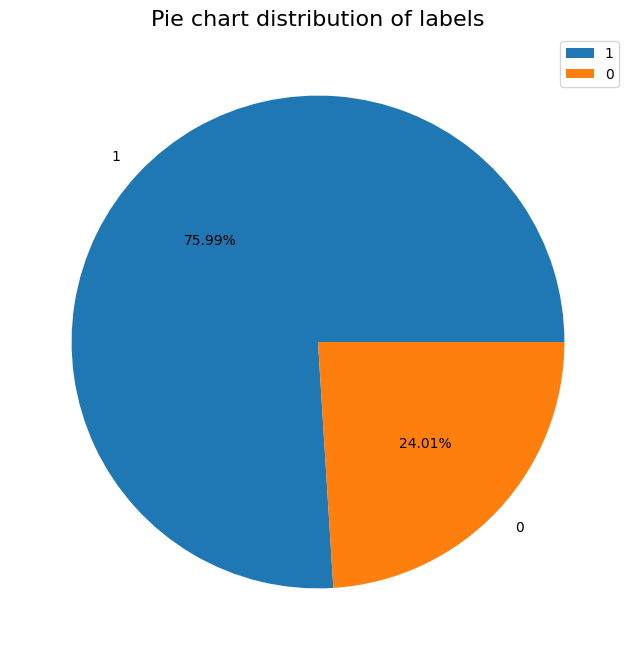

In [ ]:
import matplotlib.pyplot as plt

# Get value counts and labels dynamically
label_counts = data.label.value_counts()
labels = label_counts.index  # Automatically get unique labels

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=labels, autopct='%0.2f%%')
plt.title("Pie chart distribution of labels", fontsize=16)
plt.legend()
plt.show()


## **Multi-class Classification**

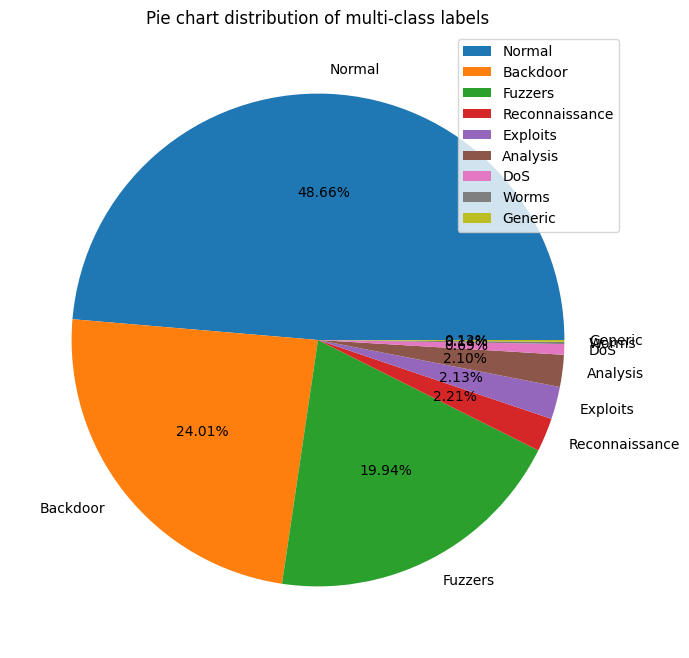

In [ ]:
import os
import matplotlib.pyplot as plt

# Ensure the 'plots/' directory exists
os.makedirs('plots', exist_ok=True)

# Generate the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    data.attack_cat.value_counts(),
    labels=data.attack_cat.unique(),
    autopct='%0.2f%%'
)
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')

# Save and show the plot
plt.savefig('plots/Pie_chart_multi.png')
plt.show()


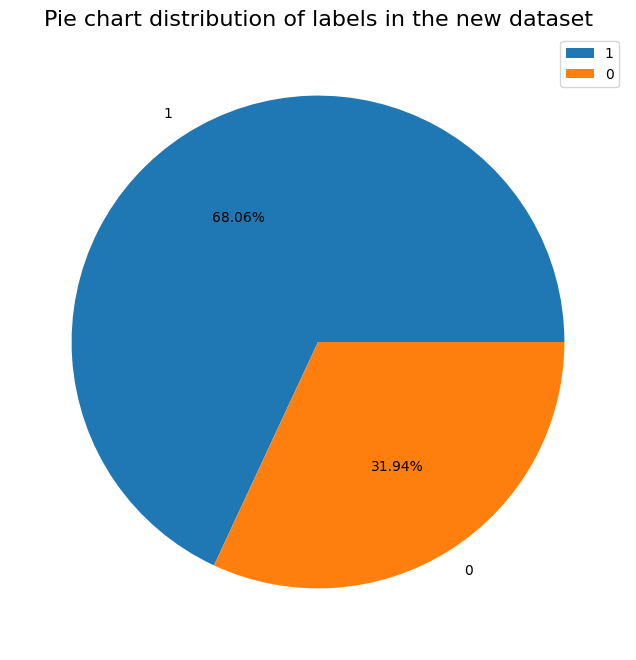

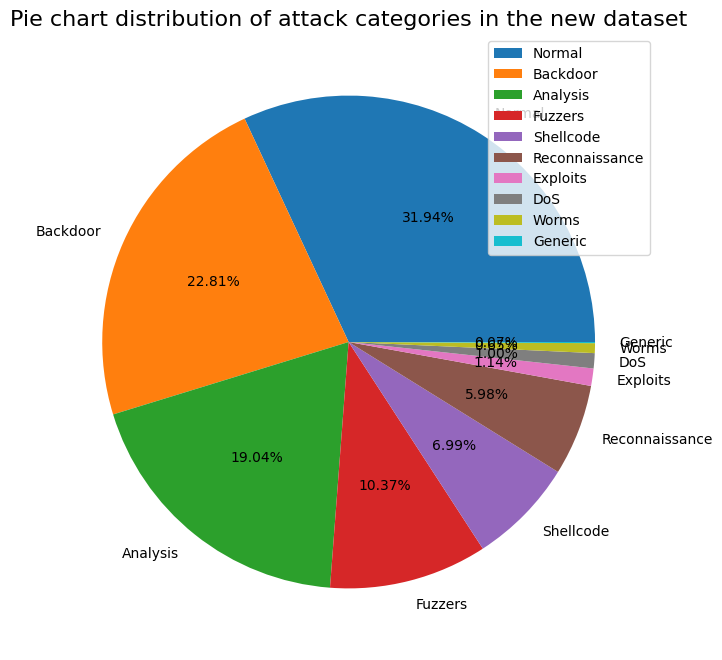

In [ ]:
import os
import matplotlib.pyplot as plt

# Ensure the 'plots/' directory exists for saving the plots
os.makedirs('plots', exist_ok=True)

# 1. Pie chart for label distribution
label_counts_new = new_data.label.value_counts()  # Get the value counts for 'label'
labels_new = label_counts_new.index  # Unique labels

plt.figure(figsize=(8, 8))
plt.pie(
    label_counts_new,
    labels=labels_new,
    autopct='%0.2f%%'
)
plt.title("Pie chart distribution of labels in the new dataset", fontsize=16)
plt.legend(loc='best')
plt.show()

# 2. Pie chart for 'attack_cat' distribution (assuming the column exists in the new data)
attack_cat_counts_new = new_data.attack_cat.value_counts()  # Get value counts for 'attack_cat'
attack_cat_labels_new = new_data.attack_cat.unique()  # Unique attack categories

plt.figure(figsize=(8, 8))
plt.pie(
    attack_cat_counts_new,
    labels=attack_cat_labels_new,
    autopct='%0.2f%%'
)
plt.title("Pie chart distribution of attack categories in the new dataset", fontsize=16)
plt.legend(loc='best')

# Save the pie chart as an image file
plt.savefig('plots/Pie_chart_attack_cat_new.png')
plt.show()


# **One hot encoding**

In [ ]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.shape

(81173, 45)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(81173, 64)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.shape

(81173, 61)

In [ ]:
# Selecting numerical columns from the new data
num_col_new = new_data.select_dtypes(include='number').columns

# Selecting categorical data attributes
cat_col_new = new_data.columns.difference(num_col_new)
cat_col_new = cat_col_new[1:]  # Skip the first column (assuming it's the label column)
print("Categorical columns in the new data:", cat_col_new)

# Creating a dataframe with only categorical attributes
data_cat_new = new_data[cat_col_new].copy()
print(data_cat_new.head())

# One-hot-encoding categorical attributes using pandas.get_dummies()
data_cat_new = pd.get_dummies(data_cat_new, columns=cat_col_new)
print(data_cat_new.head())

# Check the shape of the data
print("Shape of new data after encoding:", new_data.shape)

# Concatenating the original numerical data with the one-hot encoded categorical data
new_data = pd.concat([new_data, data_cat_new], axis=1)

# Dropping the original categorical columns from the new data
new_data.drop(columns=cat_col_new, inplace=True)
print("Shape of new data after concatenation:", new_data.shape)


Categorical columns in the new data: Index(['proto', 'service', 'state'], dtype='object')
  proto service state
0   tcp       -   FIN
1   tcp       -   FIN
2   tcp       -   FIN
3   tcp     ftp   FIN
4   tcp       -   FIN
   proto_3pc  proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
0      False      False            False      False        False       False   
1      False      False            False      False        False       False   
2      False      False            False      False        False       False   
3      False      False            False      False        False       False   
4      False      False            False      False        False       False   

   proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  ...  service_ssl  \
0      False        False          False      False  ...        False   
1      False        False          False      False  ...        False   
2      False        False          False      False  ...        False   
3    

# **Data Normalization**


In [ ]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,False,False,False,False,False,False,True,False,False,False
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,False,True,False,False,False,False,True,False,False,False
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,False,False,True,False,False,False,False,True,False,False
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,False,False,False,False,False,False,True,False,False,False
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [ ]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,False,False,False,False,False,False,True,False,False,False
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,False,True,False,False,False,False,True,False,False,False
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,False,False,True,False,False,False,False,True,False,False
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,False,False,False,False,False,False,True,False,False,False
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Selecting numeric attributes columns from new_data
num_col_new = list(new_data.select_dtypes(include='number').columns)

# Removing 'id' and 'label' columns (if they exist in new_data)
if 'id' in num_col_new:
    num_col_new.remove('id')
if 'label' in num_col_new:
    num_col_new.remove('label')

print("Numeric columns in new_data:", num_col_new)

# Using MinMaxScaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))

# Function to normalize selected numeric columns
def normalization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr), 1))
    return df

# Data before normalization
print("Data before normalization:")
print(new_data.head())

# Calling normalization function on new_data
new_data_normalized = normalization(new_data.copy(), num_col_new)

# Data after normalization
print("Data after normalization:")
print(new_data_normalized.head())


Numeric columns in new_data: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
Data before normalization:
   id       dur  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
0   1  0.121478      6      4     258     172  74.087490   252   254   
1   2  0.649902     14     38     734   42014  78.473372    62   252   
2   3  1.623129      8     16     364   13186  14.170161    62   252   
3   4  1.681642     12     12     628     770  13.677108    62   252   
4   5  0.449454     10      6     534     268  33.373826   254   252   

          sload  ...  service_ssl  state_CON  state_

# **Label Encoding**

## **Binary Labels**

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [ ]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [ ]:
num_col.append('label')

## **Correlation Matrix for Binary Labels**

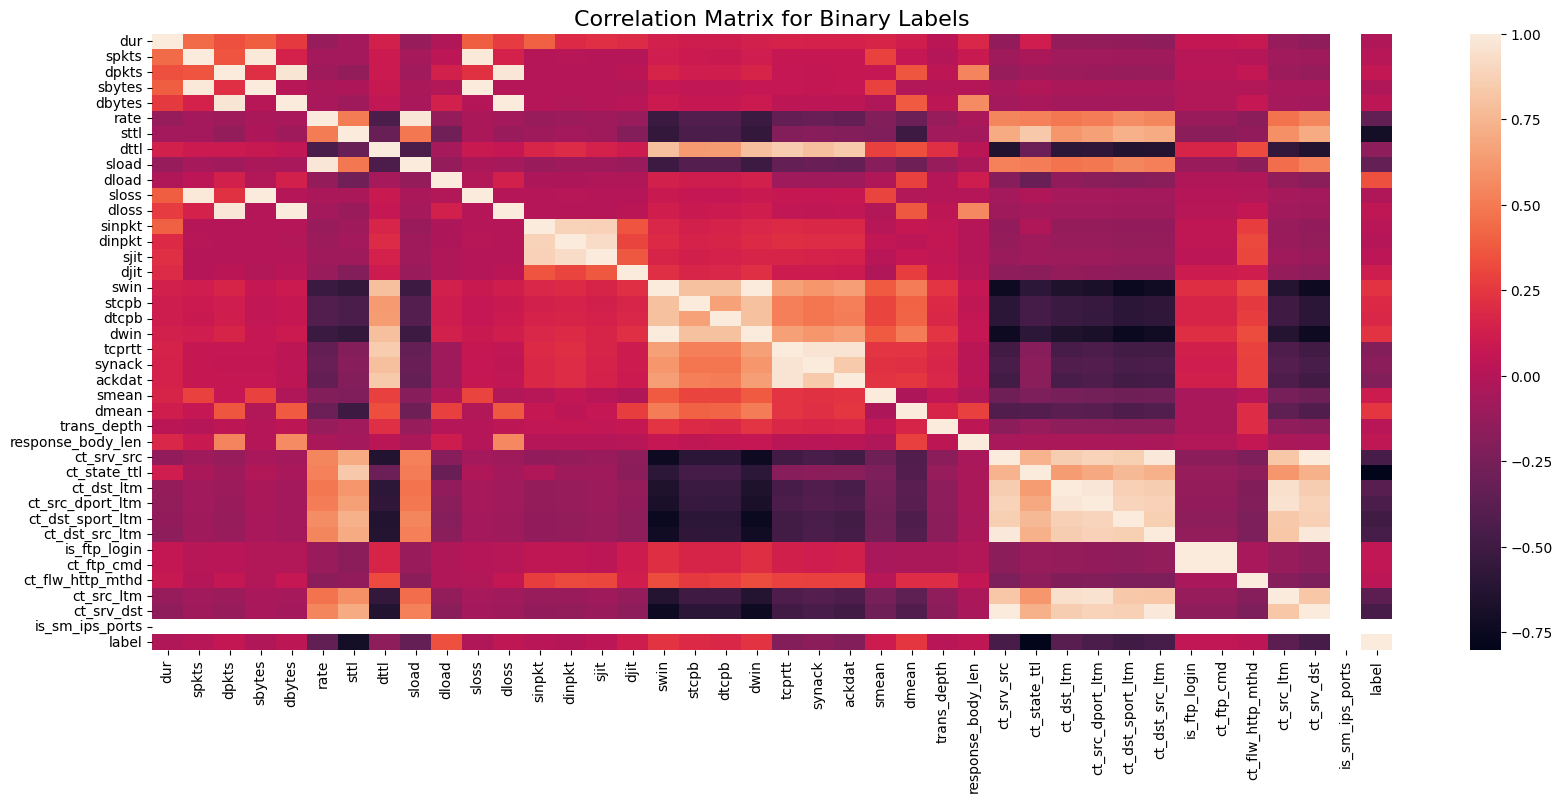

In [ ]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

## **Correlation Matrix for Multi-class Labels**

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)

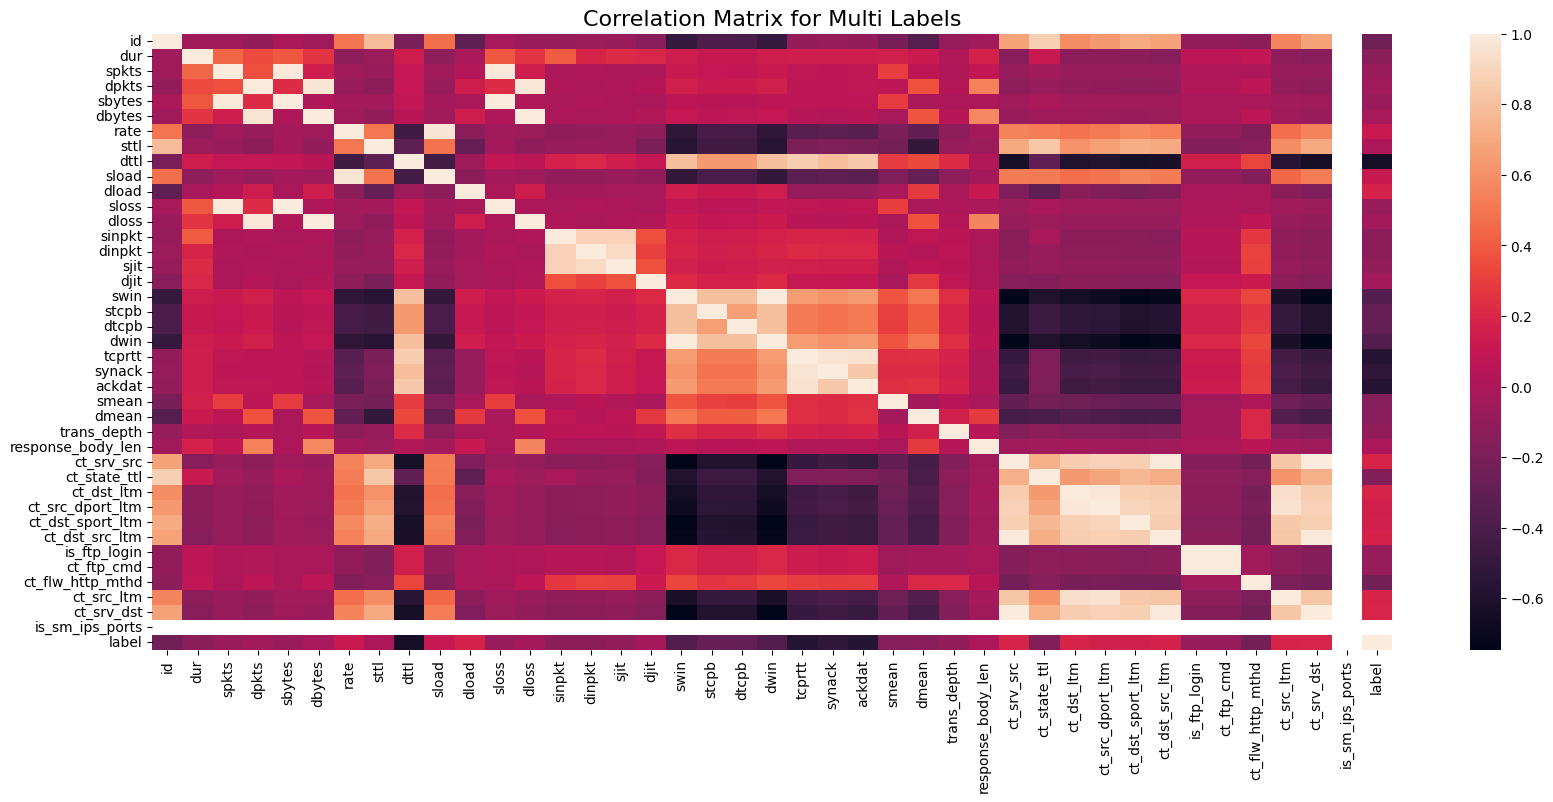

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

# **Feature Selection**

## **Binary Labels**

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

,label
sload,0.334562
dload,0.343910
rate,0.344535
ct_src_ltm,0.368486
ct_dst_ltm,0.387358
ct_src_dport_ltm,0.444874
ct_srv_dst,0.459984
ct_srv_src,0.463153
ct_dst_src_ltm,0.463735
ct_dst_sport_ltm,0.497234


In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'label'],
      dtype='object')

In [ ]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0


### **Saving Prepared Dataset to Disk**

In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs('./datasets', exist_ok=True)

# Now save the CSV file
bin_data.to_csv('./datasets/bin_data.csv')


## **Multi-class Labels**

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

,label
swin,0.364393
dwin,0.364393
synack,0.524027
ackdat,0.570098
tcprtt,0.570205
dttl,0.646589
label,1.000000


In [ ]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label'], dtype='object')

In [ ]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

### **Saving Prepared Dataset to Disk**

In [ ]:
multi_data.to_csv('./datasets/multi_data.csv')

# **BINARY CLASSIFICATION**

## **Data Splitting**



In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Load the original training data
# Assuming bin_data is your original dataset used for training
X = bin_data.drop(columns=['label'], axis=1)  # Features from the original data
Y = bin_data['label']  # Labels from the original data



In [ ]:
 X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.40, random_state=50)

## **Linear Support Vector Machine**

In [ ]:
lsvm_bin = SVC(kernel='linear',gamma='auto')
lsvm_bin.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_pred = lsvm_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.02242069602710194
Mean Squared Error -  0.02242069602710194
Root Mean Squared Error -  0.14973542008189625
R2 Score -  88.00288081097534
Accuracy -  97.75793039728981


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     24612
      normal       1.00      0.91      0.95      7858

    accuracy                           0.98     32470
   macro avg       0.98      0.96      0.97     32470
weighted avg       0.98      0.98      0.98     32470



In [ ]:
# Step 3: Load the new input data
new_data = pd.read_csv('/content/UNSW_NB15_training-set.csv')  # Path to the new data

# Step 4: Separate features from the new data (same as you did for the original data)
X_new = new_data.drop(columns=['label'])  # Drop the label column (if present)

# Step 5: Ensure that the features in X_new match those in X (same columns, same order)
# Align the columns of X_new to match those of X
X_new = X_new[X.columns]  # This makes sure the columns in X_new are in the same order as X

# Step 6: Preprocess X_new (if necessary, like scaling)
# If you used scaling during training, apply the same scaler to X_new
scaler = StandardScaler()  # Example: using StandardScaler (use the same scaler if you did scaling during training)
X_new_scaled = scaler.fit_transform(X_new)  # Or use .transform() if scaler was fitted earlier

# Step 7: Predict on the new input data
y_new_pred = lsvm_bin.predict(X_new_scaled)  # Predict using the trained model

# Step 8: Evaluate the model (if true labels are available)
# Assuming new_data has the true labels (for evaluation), if available
if 'label' in new_data.columns:
    y_new_true = new_data['label']
    accuracy = accuracy_score(y_new_true, y_new_pred)  # Calculate accuracy
    cls_report = classification_report(y_true=y_new_true, y_pred=y_new_pred)  # Classification report

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(cls_report)
else:
    # If no true labels, just print the predictions
    print("Predictions on the new data:", y_new_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.2790
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.13      0.10     56000
           1       0.46      0.35      0.40    119341

    accuracy                           0.28    175341
   macro avg       0.27      0.24      0.25    175341
weighted avg       0.34      0.28      0.30    175341



## **Random Forest Classifier**

In [ ]:
 rf_bin = RandomForestClassifier(random_state=42)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.0157376039421004
Mean Squared Error -  0.0157376039421004
Root Mean Squared Error -  0.12544960718192943
R2 Score -  91.31614139536896
Accuracy -  98.42623960578996


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     24768
      normal       0.98      0.96      0.97      7702

    accuracy                           0.98     32470
   macro avg       0.98      0.97      0.98     32470
weighted avg       0.98      0.98      0.98     32470



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the new input data (already loaded as new_data_normalized)
# new_data = pd.read_csv('/content/UNSW_NB15_training-set.csv')  # Path to the new data

# Step 2: Separate features from the new data (same as you did for the original data)
X_new = new_data_normalized.drop(columns=['label'])  # Drop the label column (if present)

# Step 3: Ensure that the features in X_new match those in X (same columns, same order)
X_new = X_new[X.columns]  # This makes sure the columns in X_new are in the same order as X

# Step 4: Apply any necessary scaling (if you did scaling during training)
# If you used the same scaler during training, use the previously fitted scaler
scaler = StandardScaler()  # If not previously saved, create and fit the scaler
X_new_scaled = scaler.fit_transform(X_new)  # Fit and transform on the new data

# Convert to DataFrame with matching column names
X_new_scaled = pd.DataFrame(X_new_scaled, columns=X.columns)

# Step 5: Predict with the trained RandomForest model
y_new_pred = rf_bin.predict(X_new_scaled)  # Predict using the trained model

# Step 6: Evaluate the model (if true labels are available)
if 'label' in new_data.columns:
    y_new_true = new_data['label']
    accuracy = accuracy_score(y_new_true, y_new_pred)  # Calculate accuracy
    cls_report = classification_report(y_true=y_new_true, y_pred=y_new_pred)  # Classification report

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(cls_report)
else:
    # If no true labels, just print the predictions
    print("Predictions on the new data:", y_new_pred)


Accuracy: 0.2593
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.07      0.06     56000
           1       0.44      0.35      0.39    119341

    accuracy                           0.26    175341
   macro avg       0.25      0.21      0.22    175341
weighted avg       0.32      0.26      0.28    175341



## **Decision Tree Classifier**

In [ ]:
dt_bin = DecisionTreeClassifier(random_state=42)
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.021250384970742223
Mean Squared Error -  0.021250384970742223
Root Mean Squared Error -  0.14577511780390445
R2 Score -  88.41663027597319
Accuracy -  97.87496150292577


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     24612
      normal       0.95      0.96      0.96      7858

    accuracy                           0.98     32470
   macro avg       0.97      0.97      0.97     32470
weighted avg       0.98      0.98      0.98     32470



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the new input data (already loaded as new_data_normalized)
# new_data = pd.read_csv('/content/UNSW_NB15_training-set.csv')  # Path to the new data

# Step 2: Separate features from the new data (same as you did for the original data)
X_new = new_data_normalized.drop(columns=['label'])  # Drop the label column (if present)

# Step 3: Ensure that the features in X_new match those in X (same columns, same order)
X_new = X_new[X.columns]  # This makes sure the columns in X_new are in the same order as X

# Step 4: Apply any necessary scaling (if you did scaling during training)
# If you used the same scaler during training, use the previously fitted scaler
scaler = StandardScaler()  # If not previously saved, create and fit the scaler
X_new_scaled = scaler.fit_transform(X_new)  # Fit and transform on the new data

# Convert to DataFrame with matching column names
X_new_scaled = pd.DataFrame(X_new_scaled, columns=X.columns)

# Step 5: Predict with the trained RandomForest model
y_new_pred = dt_bin.predict(X_new_scaled)  # Predict using the trained model

# Step 6: Evaluate the model (if true labels are available)
if 'label' in new_data.columns:
    y_new_true = new_data['label']
    accuracy = accuracy_score(y_new_true, y_new_pred)  # Calculate accuracy
    cls_report = classification_report(y_true=y_new_true, y_pred=y_new_pred)  # Classification report

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(cls_report)
else:
    # If no true labels, just print the predictions
    print("Predictions on the new data:", y_new_pred)


Accuracy: 0.4117
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.05      0.05     56000
           1       0.57      0.58      0.57    119341

    accuracy                           0.41    175341
   macro avg       0.31      0.32      0.31    175341
weighted avg       0.40      0.41      0.41    175341

